In [1]:
import os
import numpy
import cv2

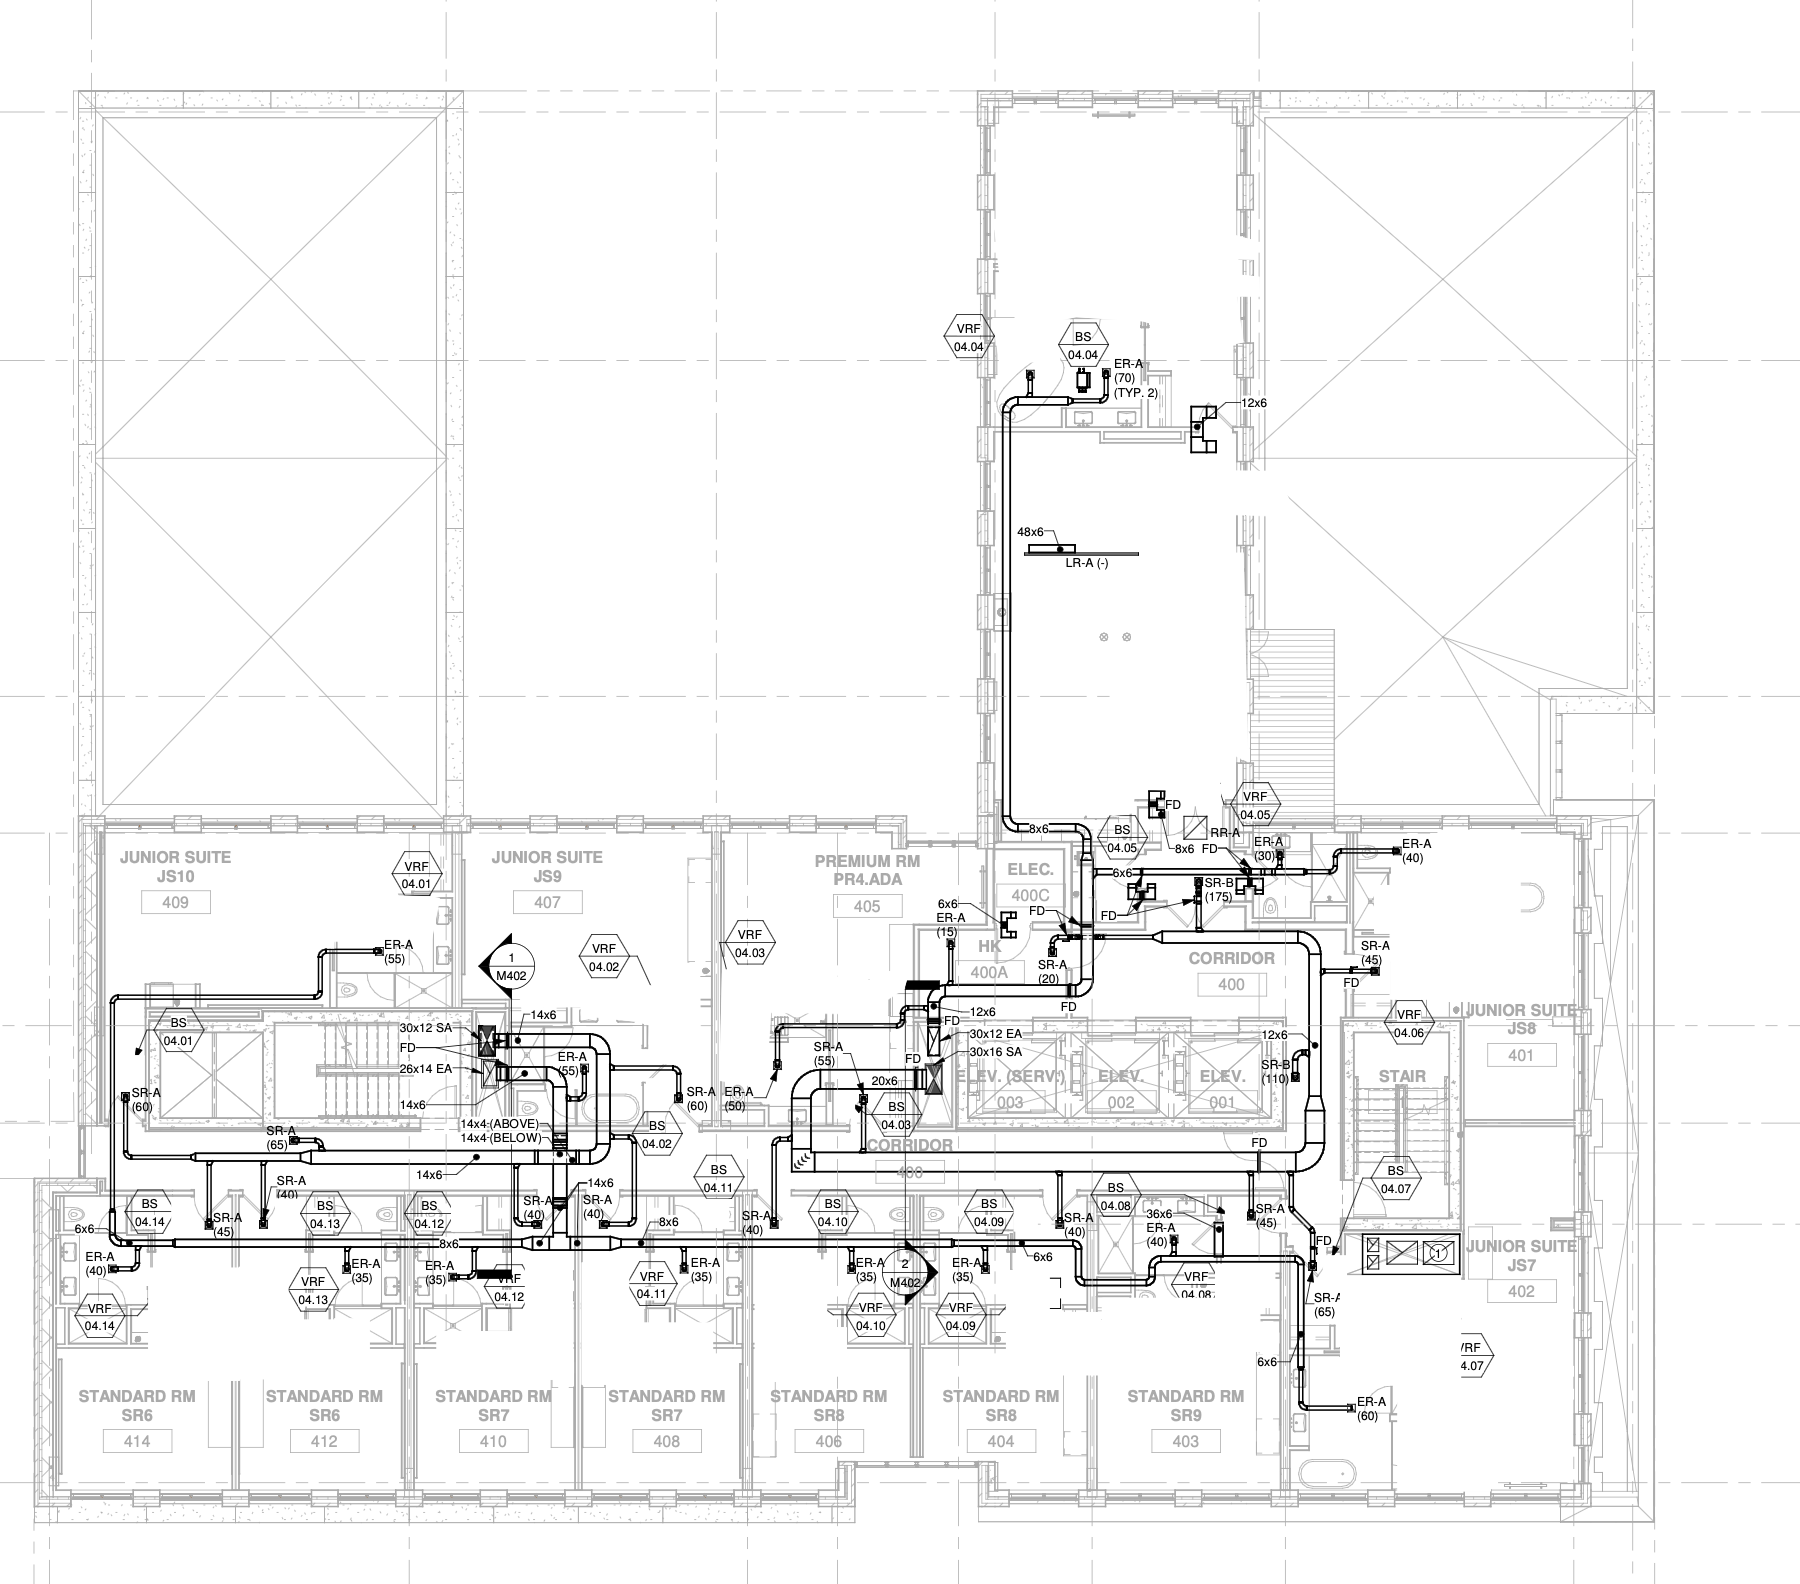

In [6]:
from PIL import Image
Image.open("test.png")

In [ ]:
def split_image_with_opencv(image_path, output_dir, patch_size, overlap):
    """
    Splits a large image into smaller, potentially overlapping patches using OpenCV.

    Args:
        image_path (str): The path to the input image file.
        output_dir (str): The directory where the output patches will be saved.
        patch_size (tuple): A tuple (width, height) for the desired patch size.
        overlap (int): The number of pixels to overlap between adjacent patches.
    """
    try:
        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Could not read the image file at '{image_path}'")
        
        img_height, img_width, _ = image.shape
        patch_width, patch_height = patch_size

        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        
        print(f"Image size: {img_width}x{img_height}")
        print(f"Patch size: {patch_width}x{patch_height}")
        print(f"Overlap: {overlap} pixels")

        # Calculate the step size (stride)
        stride_x = patch_width - overlap
        stride_y = patch_height - overlap

        patch_count = 0
        # Iterate over the image
        for y in range(0, img_height, stride_y):
            for x in range(0, img_width, stride_x):
                # Define the boundary of the patch
                top = y
                left = x
                bottom = min(y + patch_height, img_height)
                right = min(x + patch_width, img_width)

                # Extract the patch using NumPy slicing
                # Note: OpenCV uses (height, width) or (y, x) indexing
                patch = image[top:bottom, left:right]

                if patch.shape[0] > 0 and patch.shape[1] > 0:
                    # Create a unique filename
                    filename = f"patch_{y}_{x}.png"
                    output_path = os.path.join(output_dir, filename)
                    
                    # Save the patch
                    cv2.imwrite(output_path, patch)
                    patch_count += 1
                    
        print(f"Successfully created {patch_count} patches in '{output_dir}'")

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
